In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon
from datetime import datetime #<-- note this one is for our time series analysis 


## Question 1
## 1. Describe the data, its structure, data types, formats etc
Data is a csv table describing location, date, type of eviction, and the marshal who comepleted it for all evictions from 2017 to present day. The table has 66,402 rows and 20 columns meaning there are 20 fields for each of the 66,402 evictions that have occured in this time frame. The data type for each field can be seen below, primarily a mix of objects and float64 types. 

In [2]:
#import and view table
evictions = pd.read_csv('Evictions.csv')
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,Not an Ejectment,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,Not an Ejectment,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,Not an Ejectment,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing


In [3]:
#shape of data
evictions.shape

(66402, 20)

In [4]:
#data description
evictions.describe()

,Docket Number,Eviction Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,66402.000000,66402.000000,60088.000000,60088.000000,60088.000000,60088.000000,60088.000000,5.997100e+04,5.997100e+04
mean,154596.373904,10792.352715,40.752980,-73.907309,8.008205,23.680585,8497.005575,2.698947e+06,2.622583e+09
std,148934.155878,519.078533,0.091077,0.067737,4.562565,13.662573,21663.030723,1.113010e+06,1.059270e+09
min,103.000000,0.000000,40.499050,-74.251262,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,60678.500000,10455.000000,40.672730,-73.943914,4.000000,13.000000,198.000000,2.010366e+06,2.028260e+09
50%,91350.500000,10472.000000,40.754493,-73.909411,8.000000,18.000000,379.000000,2.127481e+06,2.057030e+09
75%,291883.000000,11229.000000,40.836960,-73.870833,12.000000,36.000000,970.750000,3.337062e+06,3.071590e+09
max,496987.000000,12221.000000,40.911588,-73.701430,18.000000,51.000000,157903.000000,5.171959e+06,5.080490e+09


In [5]:
#data types for each field
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

# Question 2
## 2. Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

The number of evictions have decreased in recent years. 2017 had the largest number of evictions. 2021 had the smallest number at only 7, followed by 2020 at 3,387. The reason for the huge decrease in 2020 and 2021 is the moratorium on evictions from COVID-19 that has been enforced in many cities across the US. I am curious as to why it went down consistently in 2018 and 2019 as well, I am thinking that may be due to an improving economy at the time since the numbers are not extremely significant but did decrease steadily over those two years. 

In [6]:
#Convert 'Executed Date' field into Datetime
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], format="%m/%d/%Y")

In [7]:
evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial               object
BOROUGH                              object
Eviction Postcode                     int64
Ejectment                            object
Eviction/Legal Possession            object
Latitude                            float64
Longitude                           float64
Community Board                     float64
Council District                    float64
Census Tract                        float64
BIN                                 float64
BBL                                 float64
NTA                                  object
dtype: object

In [8]:
#Data starts in 2017 so filter out dates after 12/31/2017
Evictions2017 = evictions[evictions['Executed Date']<= '12/31/2017']
len(Evictions2017)

22530

In [9]:
#filter data so its all dates before 12/31/2018
Evictions20172018 = evictions[evictions['Executed Date'] <= '12/31/2018']

#Now filter to after 01/01/2018 so it's only 2018
Evictions2018 = Evictions20172018[Evictions20172018['Executed Date'] >= '01/01/2018']

#length of dataset will tell us how many evictions happened that year
len(Evictions2018)

21830

In [10]:
#same process as above for 2019
Evictions20172019 = evictions[evictions['Executed Date'] <= '12/31/2019']
Evictions2019 = Evictions20172019[Evictions20172019['Executed Date'] >= '01/01/2019']
len(Evictions2019)

18647

In [11]:
#again for 2020
Evictions20172020 = evictions[evictions['Executed Date'] <= '12/31/2020']
Evictions2020 = Evictions20172020[Evictions20172020['Executed Date'] >= '01/01/2020']
len(Evictions2020)

3387

In [12]:
#and again for 2021
Evictions20172021 = evictions[evictions['Executed Date'] <= '12/31/2021']
Evictions2021 = Evictions20172021[Evictions20172021['Executed Date'] >= '01/01/2021']
len(Evictions2021)

7

# Question 3
## 3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.

The ratio in the entire data is about 0.092. Overall, the ratio hovered around 0.09 and 0.1, between 0.083 and 0.12 in 2020. The bar graph at the bottom shows that the ratio has been increasing over the years. 2021 did not allow for a ratio because residential evictions is at 0 due to the moratorium. The moratorium also caused the ratio to increase because commercial evictions seem to have continued while residential ones were not allowed. 

In [13]:
residential_evictions = len(evictions[evictions['Residential/Commercial'] == 'Residential'])
commercial_evictions = len(evictions[evictions['Residential/Commercial'] == 'Commercial'])

#entire data ratio
ratio_ComRes = commercial_evictions/residential_evictions
print(ratio_ComRes)

0.09197651663405088


In [14]:
#using data from Q2 to seperate by year
residential_evictions2017 = len(Evictions2017[Evictions2017['Residential/Commercial'] == 'Residential'])
commercial_evictions2017 = len(Evictions2017[Evictions2017['Residential/Commercial'] == 'Commercial'])

#2017 data ratio
ratio_ComRes2017 = commercial_evictions2017/residential_evictions2017
print(ratio_ComRes2017)

0.0826525708793849


In [15]:
residential_evictions2018 = len(Evictions2018[Evictions2018['Residential/Commercial'] == 'Residential'])
commercial_evictions2018 = len(Evictions2018[Evictions2018['Residential/Commercial'] == 'Commercial'])

#2018 data ratio
ratio_ComRes2018 = commercial_evictions2018/residential_evictions2018
print(ratio_ComRes2018)

0.09215529317590554


In [16]:
residential_evictions2019 = len(Evictions2019[Evictions2019['Residential/Commercial'] == 'Residential'])
commercial_evictions2019 = len(Evictions2019[Evictions2019['Residential/Commercial'] == 'Commercial'])

#2019 data ratio
ratio_ComRes2019 = commercial_evictions2019/residential_evictions2019
print(ratio_ComRes2019)

0.09849779086892489


In [17]:
residential_evictions2020 = len(Evictions2020[Evictions2020['Residential/Commercial'] == 'Residential'])
commercial_evictions2020 = len(Evictions2020[Evictions2020['Residential/Commercial'] == 'Commercial'])

#2020 data ratio
ratio_ComRes2020 = commercial_evictions2020/residential_evictions2020
print(ratio_ComRes2020)

0.11598023064250412


In [19]:
residential_evictions2021 = len(Evictions2021[Evictions2021['Residential/Commercial'] == 'Residential'])
commercial_evictions2021 = len(Evictions2021[Evictions2021['Residential/Commercial'] == 'Commercial'])

#2021 data ratio - 0 residential evicitons
ratio_ComRes2021 = commercial_evictions2021/residential_evictions2021
print(ratio_ComRes2021)

ZeroDivisionError: division by zero

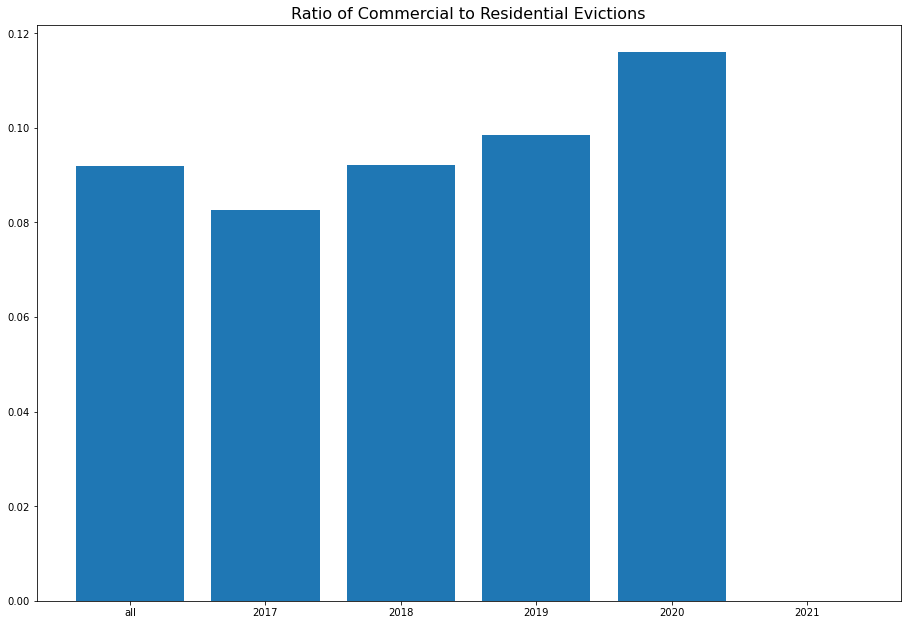

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
year = ['all','2017', '2018', '2019', '2020', '2021']
#copied and pasted numbers from ratio for all data and each year
ratio = [0.09197651663405088,0.0826525708793849, 0.09215529317590554, 0.09849779086892489, 0.11598023064250412, 0]



ax.bar(year,ratio)
plt.title('Ratio of Commercial to Residential Evictions', fontsize = 16)
plt.show()

# Question 4
## What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?

Justin Grossman        9173
Henry Daley            6487
Ileana Rivera          5842
Thomas Bia             5560
Edward Guida           5422

In [19]:
Marshal = []
#Create full name field for Marshals
Marshal = evictions['Marshal First Name'] + evictions['Marshal Last Name']

evictions['Marshal'] = Marshal

In [20]:
evictions.Marshal.value_counts()

JustinGrossman        9173
HenryDaley            6487
IleanaRivera          5842
ThomasBia             5560
EdwardGuida           5422
DannyWeinheim         5350
RichardMcCoy          4023
DarleneBarone         3730
GeorgeEssock, Jr.     2661
RobertRenzulli        2403
MaxineChevlowe        1870
RichardCapuano        1870
GaryRose              1557
AlfredLocascio        1425
GeorgeEssock          1417
RonaldPazant          1337
JohnVillanueva         822
VadimBarbarovich       804
KennethGiachetta       771
StevenPowell           757
HowardSchain           713
FrankSiracusa          551
BernardBlake           446
CharlesMarchisotto     394
SalavatoreGiglio       388
BruceKemp              366
JeffreyRose            145
RobertSolimine         118
Name: Marshal, dtype: int64

# Question 5
## How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.

The overall ranking of Boroughs based on the number of evictions stays consistent from 2017 to 2020. The Bronx shows to have the most evictions but has the second lowest population above Staten Island. Following that though, Brooklyn Queens and then Manhattan follow order from largest to smallest population. THe Bronx is alrgely low-income and more residential than the other boroughs which may explain its oddly high number of evictions. 

In [21]:
#again using data from Q2 and value count by borough
Evictions2017.BOROUGH.value_counts()

BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64

In [22]:
Evictions2018.BOROUGH.value_counts()

BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64

In [23]:
Evictions2019.BOROUGH.value_counts()

BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64

In [24]:
Evictions2020.BOROUGH.value_counts()

BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64

In [25]:
Evictions2021.BOROUGH.value_counts()

BROOKLYN     3
QUEENS       2
MANHATTAN    1
BRONX        1
Name: BOROUGH, dtype: int64

# Question 6
## Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.
There were some major outliers in the number of evictions. Many of them are centralized in the Bronx of Central Brooklyn. Since this based on number and not perfectly comparable, this may be a result of low income level partered with a high number of renters in the area.

In [26]:
#checking what to look for to make sure map is correct
evictions.NTA.value_counts()

East New York                                 1363
Crown Heights North                           1303
East Concourse-Concourse Village              1227
Central Harlem North-Polo Grounds             1195
Williamsbridge-Olinville                      1186
                                              ... 
Arden Heights                                   25
Rossville-Woodrow                               18
Annadale-Huguenot-Prince's Bay-Eltingville      17
park-cemetery-etc-Queens                         7
park-cemetery-etc-Brooklyn                       6
Name: NTA, Length: 191, dtype: int64

In [27]:
NTA = gpd.read_file('Neighborhood Tabulation Areas (NTA)')

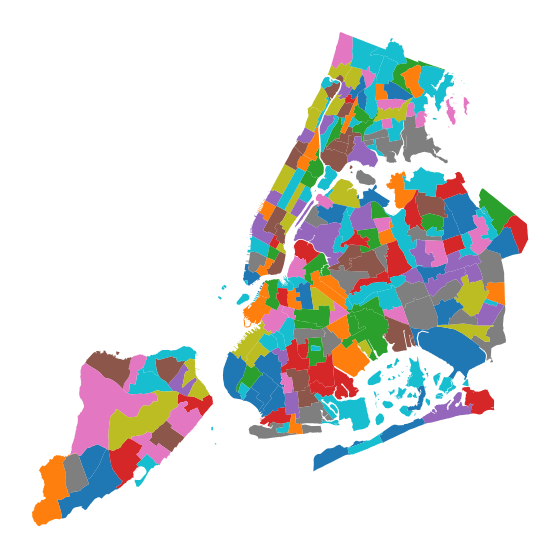

In [28]:
#checking NTA shapefile
NTA.plot(column='ntaname',legend=False,figsize=(40, 10),markersize=0.1)
plt.axis('off')
plt.show()

In [29]:
#changing field name so they match and can be merged
evictions['ntaname'] = evictions['NTA']

In [30]:
#Make independent table out of evictions per NTA value counts information
EvictionsNTA = evictions.ntaname.value_counts()
EvictionsNTA = EvictionsNTA.reset_index()
EvictionsNTA.columns = ['ntaname', 'evictions'] # change column names

EvictionsNTA

,ntaname,evictions
0,East New York,1363
1,Crown Heights North,1303
2,East Concourse-Concourse Village,1227
3,Central Harlem North-Polo Grounds,1195
4,Williamsbridge-Olinville,1186
...,...,...
186,Arden Heights,25
187,Rossville-Woodrow,18
188,Annadale-Huguenot-Prince's Bay-Eltingville,17
189,park-cemetery-etc-Queens,7


In [31]:
#merge evictions per NTA with NTA shapefile
EvictionsPerNTA = NTA.merge(EvictionsNTA, on='ntaname')

EvictionsPerNTA

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,POC_Per,geometry,evictions
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,None,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",181
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,None,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",177
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,None,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",96
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335781,None,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",218
4,3.0,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022918,None,"POLYGON ((-73.95859 40.61040, -73.95828 40.608...",162
...,...,...,...,...,...,...,...,...,...,...
186,1.0,Manhattan,061,MN06,Manhattanville,1.064694e+07,17040.646469,None,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",136
187,3.0,Brooklyn,047,BK73,North Side-South Side,2.887016e+07,28149.966570,None,"POLYGON ((-73.95814 40.72440, -73.95772 40.724...",200
188,3.0,Brooklyn,047,BK90,East Williamsburg,3.913241e+07,49247.014740,None,"POLYGON ((-73.92406 40.71411, -73.92404 40.714...",132
189,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891069,None,"POLYGON ((-73.97854 40.73689, -73.97857 40.736...",68


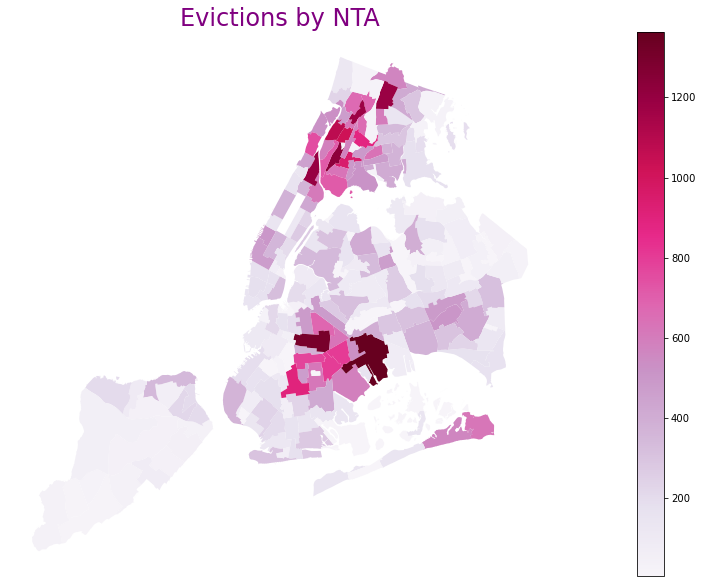

In [32]:
EvictionsPerNTA.plot(column = 'evictions', legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('Evictions by NTA', fontsize = 24, color = 'purple')
plt.axis('off')
plt.show()

# Question 7
## Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections

I chose to look at how rent burdened the population is based on ACS housing data about the percentage of household income spent on rent. I focused on the Estimates of households who spent 50% or more of their housheold income on rent because percentage would not line up with evictions that was based on an amount, not a percentage. I expected that to have a significant correlation with the amount of evictions since failure to pay rent is a common reason for eviction. There is some correlation between the two. Originally I compared percentage of households rather than number and there was no correlation. Therefore, population and number of renters is a huge factor in this data. Source: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-acs-nta.page

In [37]:
#load ACS Housing Data by NTA
ACShousingData = gpd.read_file('NTA ACS Housing Data')

In [38]:
ACShousingData

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,geotype,geogname,geoid,dataset,...,grpi50plP,grpi50plZ,grpintcC,grpintcE,grpintcM,grpintcP,grpintcZ,Shape_Leng,Shape_Area,geometry
0,1,3,Brooklyn,047,BK88,Borough Park,NTA2010,Borough Park,BK88,Y2014-2018,...,50.2,2.6,11.6,977.0,186.0,None,None,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,2,4,Queens,081,QN51,Murray Hill,NTA2010,Murray Hill,QN51,Y2014-2018,...,41.6,4.2,12.9,1103.0,235.0,None,None,33266.904797,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,3,4,Queens,081,QN27,East Elmhurst,NTA2010,East Elmhurst,QN27,Y2014-2018,...,42.9,5.0,25.9,189.0,81.0,None,None,19816.711908,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,4,Queens,081,QN07,Hollis,NTA2010,Hollis,QN07,Y2014-2018,...,34.1,5.9,31.6,140.0,73.0,None,None,20976.335574,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,5,1,Manhattan,061,MN06,Manhattanville,NTA2010,Manhattanville,MN06,Y2014-2018,...,32.3,4.6,25.1,356.0,147.0,None,None,17040.685413,1.064708e+07,"POLYGON ((999174.261 238490.105, 999084.570 23..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,2,Bronx,005,BX01,Claremont-Bathgate,NTA2010,Claremont-Bathgate,BX01,Y2014-2018,...,31.2,3.4,21.6,455.0,161.0,None,None,30050.115557,1.645395e+07,"POLYGON ((1014572.350 250682.762, 1014489.296 ..."
191,192,2,Bronx,005,BX14,East Concourse-Concourse Village,NTA2010,East Concourse-Concourse Village,BX14,Y2014-2018,...,36.9,2.8,14.8,1022.0,249.0,None,None,27199.911998,1.822164e+07,"POLYGON ((1009266.029 246329.172, 1009255.956 ..."
192,193,2,Bronx,005,BX99,park-cemetery-etc-Bronx,NTA2010,park-cemetery-etc-Bronx,BX99,Y2014-2018,...,27.0,10.7,0.0,0.0,0.0,None,None,223439.425999,2.208390e+08,"MULTIPOLYGON (((1020356.163 236653.068, 102035..."
193,194,4,Queens,081,QN35,Briarwood-Jamaica Hills,NTA2010,Briarwood-Jamaica Hills,QN35,Y2014-2018,...,31.8,3.9,21.2,376.0,131.0,None,None,30029.287357,2.937737e+07,"POLYGON ((1041627.321 198275.486, 1041389.733 ..."


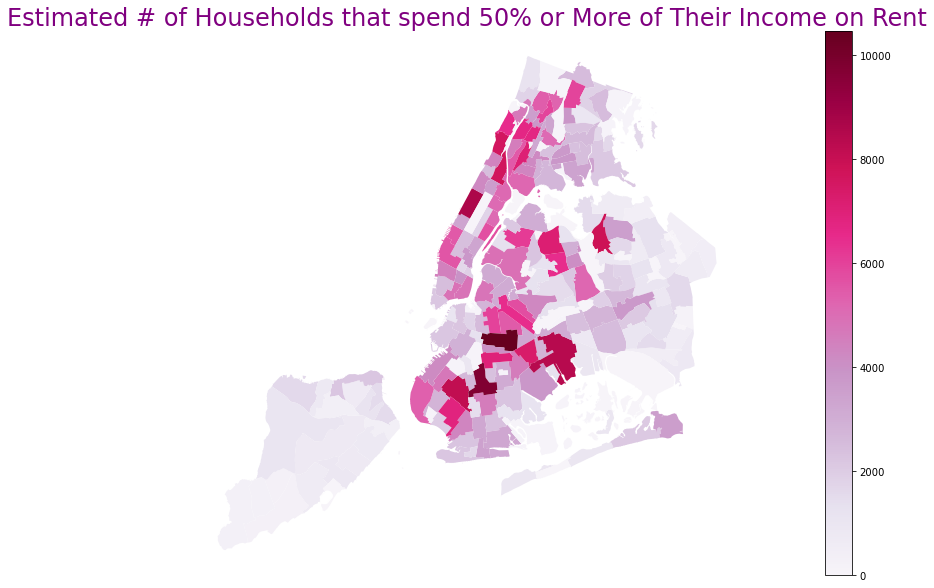

In [42]:
#Estimated of households paying 50% or more of their income in rent, considered severely rent burdened
ACShousingData.plot(column='grpi50plE',legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('Estimated # of Households that spend 50% or More of Their Income on Rent', fontsize = 24, color = 'purple')
plt.axis('off')
plt.show()

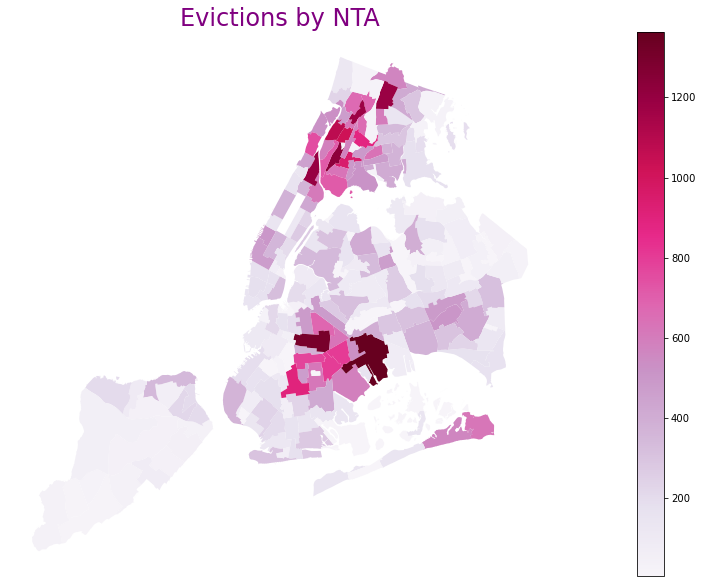

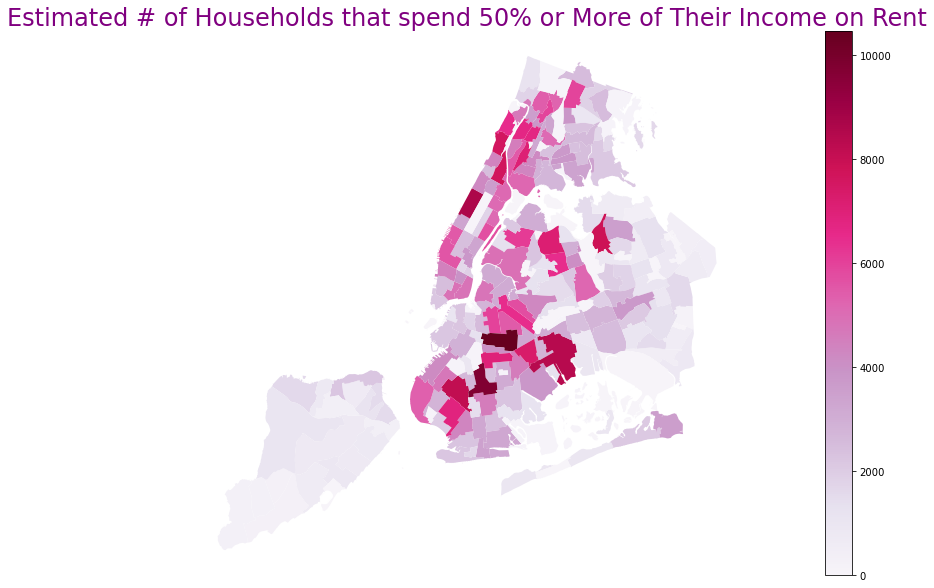

In [43]:
#1.# of Evictions per NTA Map
ax1 = EvictionsPerNTA.plot(column = 'evictions', legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('Evictions by NTA', fontsize=24, color ='purple')
plt.axis('off')
plt.show()

#2. severely rent burdened households per NTA map
ax2 = ACShousingData.plot(column='grpi50plE',legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('Estimated # of Households that spend 50% or More of Their Income on Rent', fontsize=24, color ='purple')
plt.axis('off')
plt.show()